# Feature Extraction

In [16]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import csv
from tqdm import tqdm_notebook
import scipy.stats as ss
from multiprocessing.dummy import Pool as ThreadPool 

n_images = 4


def get_image_features(img, x1, y1, x2, y2, verbose=False):
    img = img[x1:x2, y1:y2]
    dst = cv2.fastNlMeansDenoising(img)
    noise = img - dst
    resized_noise = cv2.resize(noise, (20, 20))
    if verbose:
        print(np.mean(noise), np.std(noise))
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))
        ax1.imshow(img, cmap='gray')
        ax2.imshow(dst, cmap='gray')
        ax3.imshow(noise, cmap='gray')
        ax4.imshow(resized_noise, cmap='gray')  
    orig_features = [np.mean(noise),
                     np.std(noise),
                     np.median(noise),
                     np.min(noise),
                     np.max(noise),
                     np.sum(noise),
                     ss.entropy(noise.flatten()),
                     ss.variation(noise.flatten()),
                     len(noise[noise == 0]),
                     len(noise[noise > 0]),
                     np.mean(noise[noise > 0]),
                     np.std(noise[noise > 0]),
                     np.median(noise[noise > 0]),
                     ss.entropy(noise[noise > 0].flatten()),
                     ss.variation(noise[noise > 0].flatten()),
                    ]
    img_hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    return np.concatenate((orig_features, resized_noise.flatten(), img_hist))


def get_path_features(path, verbose=False):
    features_list = []
#     img = cv2.imread(path)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    for angle in [0]#, 90, 90, 90]:
        if angle != 0:
            img = np.rot90(img)
        for _ in range(0, n_images):
            (h, w) = img.shape[:2]
#             x, y = np.random.randint(h-512), np.random.randint(w-512)
            features_list.append(
                get_image_features(img, 0, 0, 512, 512, verbose).tolist() +
                [os.path.basename(os.path.dirname(path)),
                 os.path.basename(path)]
            )
    return features_list

def save_all_features(paths, output, verbose=False):
    with open(output, 'w') as myfile:
        wr = csv.writer(myfile, quoting=csv.QUOTE_NONNUMERIC)
        
#         pool = Threadresults = pool.map(get_path_features, tqdm_notebook(paths))Pool(5) 
#         results = pool.map(get_path_features, tqdm_notebook(paths))
#         pool.close() 
#         pool.join() 
        results = map(get_path_features, tqdm_notebook(paths))
        for features_list in results:
            #features_list = get_path_features(path, verbose)
            for features in features_list:
                wr.writerow(features)

# paths = ['train/Samsung-Galaxy-Note3/(GalaxyN3)54.jpg']
# save_all_features(paths, 'features.csv', True)

SyntaxError: invalid syntax (<ipython-input-16-e74509afb91b>, line 50)

In [75]:
img = cv2.imread('train/Samsung-Galaxy-Note3/(GalaxyN3)54.jpg', cv2.IMREAD_GRAYSCALE)
img = img[0:512, 0:512]
img_hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
dst = cv2.fastNlMeansDenoising(img)
noise = img - dst
noise.shape
teste = np.mean(noise)
t = img.flatten()
c = ss.entropy(noise.flatten())
img_hist.shape

(256,)

In [3]:
from datetime import datetime

paths = []
base_dir = '/home/p4w/Documentos/mestrado/practical_assingments/pract_2/train'
for device_dir in os.listdir(base_dir):
    for file in os.listdir(os.path.join(base_dir, device_dir)):
        paths.append(os.path.join(base_dir, device_dir, file))
      
print('Extracting features of {} images...'.format(len(paths)))
print('Started at {}'.format(datetime.now()))
save_all_features(paths, 'features.csv')
print('Finished at {}'.format(datetime.now()))

Extracting features of 2750 images...
Started at 2018-04-15 09:02:27.311878


HBox(children=(IntProgress(value=0, max=2750), HTML(value='')))

/home/p4w/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2508: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)
/home/p4w/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:998: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis) / a.mean(axis)
/home/p4w/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/p4w/.local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/p4w/.local/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/p4w/.local/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/


Finished at 2018-04-15 16:30:53.730293


In [17]:
from datetime import datetime

paths = []
base_dir = '/home/p4w/Documentos/mestrado/practical_assingments/pract_2/test'
# for device_dir in os.listdir(base_dir):
for file in os.listdir(base_dir):
    paths.append(os.path.join(base_dir, file))

# print(paths)
      
print('Extracting features of {} images...'.format(len(paths)))
print('Started at {}'.format(datetime.now()))
save_all_features(paths, 'features_test.csv')
print('Finished at {}'.format(datetime.now()))

Extracting features of 2640 images...
Started at 2018-04-20 00:03:56.354489


HBox(children=(IntProgress(value=0, max=2640), HTML(value='')))

KeyboardInterrupt: 

# Show some image

(4128, 2322)


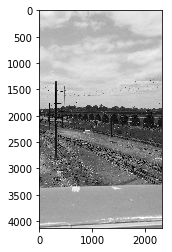

In [211]:
img = cv2.imread('train/Samsung-Galaxy-Note3/(GalaxyN3)54.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img, cmap='gray')

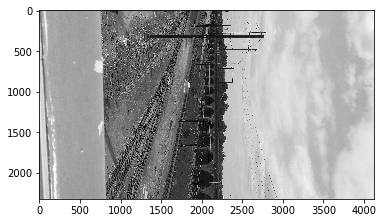

In [141]:
plt.imshow(rotate_image_90(img, 90), cmap='gray')

# Train Model

In [2]:
general_features = [
    'noises_mean',
    'noises_std',
    'noises_median',
    'noises_min',
    'noises_max',
    'noises_sum',
    'noises_entropy',
    'noises_variation',
    'noises_zero_count',
    'noises_non_zero_count',
    'noises_non_zero_mean',
    'noises_non_zero_std',
    'noises_non_zero_median',
    'noises_non_zero_entropy',
    'noises_non_zero_variation'
]
noise_features = ['noise_{:03}'.format(n) for n in range(400)]
hist_features = ['hist_{:03}'.format(n) for n in range(256)]

columns = general_features + noise_features + hist_features + ['device', 'filename']

In [3]:
import pandas as pd

df_train = pd.read_csv('features.csv', names=columns)
print(len(df_train))
df_train.head()

110000


,noises_mean,noises_std,noises_median,noises_min,noises_max,noises_sum,noises_entropy,noises_variation,noises_zero_count,noises_non_zero_count,...,hist_248,hist_249,hist_250,hist_251,hist_252,hist_253,hist_254,hist_255,device,filename
0,82.504398,118.298623,1.0,0.0,255.0,21628033.0,11.386363,1.433846,94505.0,167639.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Motorola-X,(MotoX)36.jpg
1,74.010738,114.851078,1.0,0.0,255.0,19401471.0,11.276117,1.551816,113607.0,148537.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Motorola-X,(MotoX)36.jpg
2,72.759136,114.186790,1.0,0.0,255.0,19073371.0,11.262051,1.569381,114187.0,147957.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Motorola-X,(MotoX)36.jpg
3,80.632458,117.726684,1.0,0.0,255.0,21137315.0,11.359408,1.460041,100087.0,162057.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Motorola-X,(MotoX)36.jpg
4,67.198708,111.545766,1.0,0.0,255.0,17615738.0,11.178575,1.659939,127818.0,134326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Motorola-X,(MotoX)36.jpg


In [4]:
df_train[df_train.noises_mean == 0].device.value_counts()

Motorola-Nexus-6        59
Sony-NEX-7              31
Samsung-Galaxy-S4       27
Samsung-Galaxy-Note3    16
LG-Nexus-5x             14
iPhone-4s               12
Motorola-X               9
Motorola-Droid-Maxx      8
iPhone-6                 4
HTC-1-M7                 1
Name: device, dtype: int64

In [6]:
df_train.fillna(0, inplace=True)

In [7]:
df_train.replace(np.inf, 0, inplace=True)
df_train.replace(-np.inf, 0, inplace=True)

# ML model

In [8]:
features = df_train.columns.drop(['device', 'filename'])
X = df_train[general_features + hist_features].values
y = df_train['device'].values

In [9]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

classifier = RandomForestClassifier(100, random_state=1986)

cv = StratifiedKFold(5, True, 1986)
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
print(scores, scores.mean())

[0.69363636 0.69554545 0.70286364 0.70709091 0.70009091] 0.6998454545454545
CPU times: user 8min 58s, sys: 1.55 s, total: 8min 59s
Wall time: 9min


In [ ]:
classifier.predict()

## Preparando X_test

In [241]:
from multiprocessing.dummy import Pool as ThreadPool 
import time


def test(value):
    print(value, 'entrou')
    time.sleep(5)
    print(value, 'saiu')
    return value * 10

values = [1, 2, 3, 4, 5,6, 7, 8, 9 ,0]

# make the Pool of workers
pool = ThreadPool(5) 
results = pool.map(test, values)
pool.close() 
pool.join() 


12 entrou
 entrou
3 entrou
45 entrou
 entrou
60 saiu
8 saiu saiu

79 saiu
 saiu
123 saiu
6 entrou saiu
7 entrou 

saiu
8 entrou
54 saiu
9 entrou
 saiu
0 entrou
7 saiu
8 saiu
6 saiu
0 saiu
9 saiu


In [242]:
results

[10, 20, 30, 40, 50, 60, 70, 80, 90, 0]